# **The Great War, 1964 by Rene Magritte**

![The great war](https://raw.githubusercontent.com/asyaf/magritte/master/images/the-great-war.jpg)

## Setup

In [0]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os

%matplotlib inline

In [2]:
!pip install face_recognition
import face_recognition

     |████████████████████████████████| 100.2MB 73kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566176 sha256=8cebfeba3b0fbb9bdc0c86d9914a4e67d10188150a6cceab0fa7587dab314ecc
  Stored in directory: /root/.cache/pip/wheels/d2/99/18/59c6c8f01e39810415c0e63f5bede7d83dfb0ffc039865465f
Successfully built face-recognition-models


In [3]:
!git clone https://github.com/asyaf/magritte.git
os.chdir("/content/magritte/code")

ROOT_DIR = os.path.abspath("..")

from utils import load_image, alpha_blend, display_image, \
    display_images, resize_image, paste_on_locations

Cloning into 'magritte'...
remote: Enumerating objects: 129, done.
remote: Counting objects: 100% (129/129), done.
remote: Compressing objects: 100% (120/120), done.
remote: Total 129 (delta 34), reused 23 (delta 4), pack-reused 0
Receiving objects: 100% (129/129), 33.37 MiB | 30.73 MiB/s, done.
Resolving deltas: 100% (34/34), done.


## Load images

In [0]:
IMG_PATH = os.path.join(ROOT_DIR, "images")
BACK_IMG = "bride.jpg"
FRONT_IMG = "purple-flowers.png"
BACK_IMG_PATH = os.path.join(IMG_PATH, BACK_IMG)
FRONT_IMG_PATH = os.path.join(IMG_PATH, FRONT_IMG)

ALT_BACK_IMG = "brides.jpg"
ALT_BACK_IMG_PATH = os.path.join(IMG_PATH, ALT_BACK_IMG)

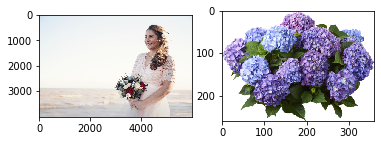

In [5]:
back_img = load_image(BACK_IMG_PATH)
front_img = load_image(FRONT_IMG_PATH, use_alpha=True)  

img_list = [back_img, front_img]
display_images(img_list)

## Run face recognition

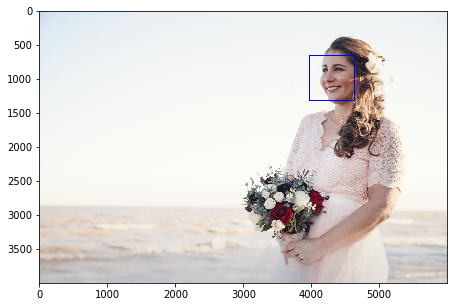

In [6]:
face_locations = face_recognition.face_locations(back_img)

# draw a box around the face
fig = plt.figure(figsize = (20,5))
ax = fig.add_subplot(111)
boxed_img = back_img.copy()
if len(face_locations) > 0:
    for (top, right, bottom, left) in face_locations:
        cv2.rectangle(boxed_img, (left, top),(right, bottom), (0, 0, 255), 10)
ax.imshow(boxed_img)
plt.show()

## Combine images

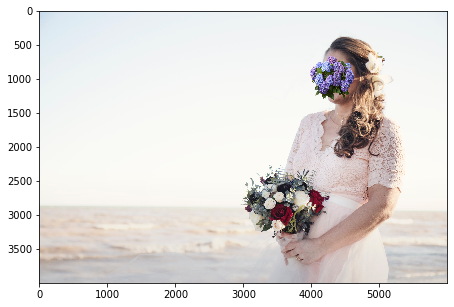

In [7]:
fig2 = plt.figure(figsize = (20,5))
ax2 = fig2.add_subplot(111)
res_img = paste_on_locations(back_img, front_img, face_locations)
plt.imshow(res_img);

## Apply to multiple people in image

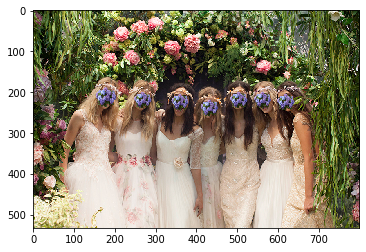

In [8]:
alt_back_img = load_image(ALT_BACK_IMG_PATH)
bride_face_locations = face_recognition.face_locations(alt_back_img)
new_res_img = paste_on_locations(alt_back_img, front_img, bride_face_locations)
display_image(new_res_img)